In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../theory/')
from galKapCl import galKapCl
from galKapPk import pggVelocileptors, pgmVelocileptors, pmmHalofit 

In [2]:
# setting up a Cl prediction class

dNdz_fname = '../data/LRG_dNdz.txt'
clPred = galKapCl(dNdz_fname, Pgg=pggVelocileptors, Pgm=pgmVelocileptors, Pmm=pmmHalofit)

# Testing background, projection kernels and effective redshifts

In [3]:
# We'll use the CLASS defaults for our fidicual cosmology
thy_args = {} 

# Background quantities
OmM,chistar,Ez,chi = clPred.background(thy_args)
H = Ez * (100./299792.458)
# projection kernels
Wk,Wg_clust,Wg_mag = clPred.projectionKernels(thy_args)

OmM = 0.30988304304812053
chistar = 9406.093256843342 Mpc/h


Text(0.5, 0, '$z$')

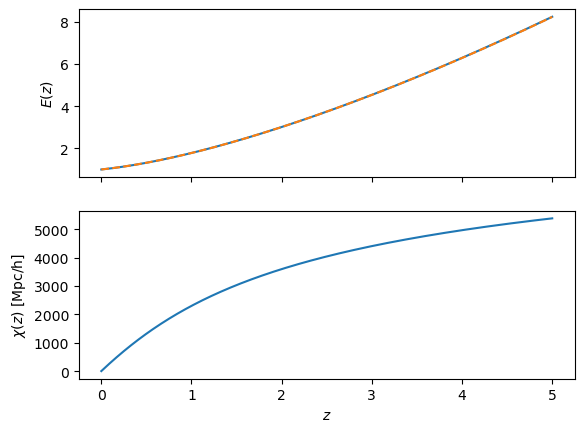

In [4]:

print('OmM =',OmM)
print('chistar =',chistar,'Mpc/h')

fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(clPred.z,Ez,c='C0') ; ax[0].plot(clPred.z,np.sqrt((1-OmM) + OmM*(1+clPred.z)**3),c='C1',ls='--')
ax[1].plot(clPred.z,chi)
ax[0].set_ylabel(r'$E(z)$')
ax[1].set_ylabel(r'$\chi(z)$ [Mpc/h]')
ax[1].set_xlabel(r'$z$')

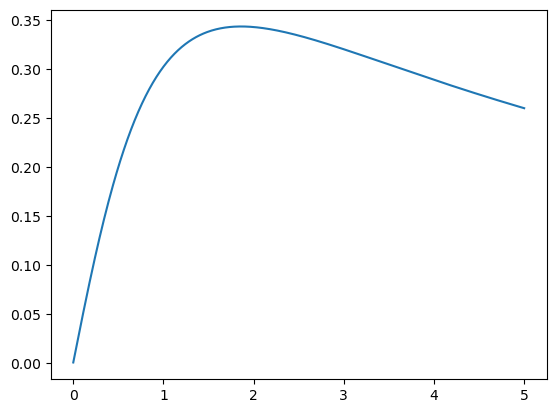

In [5]:
plt.plot(clPred.z,Wk/H)

(0.0, 1.4)

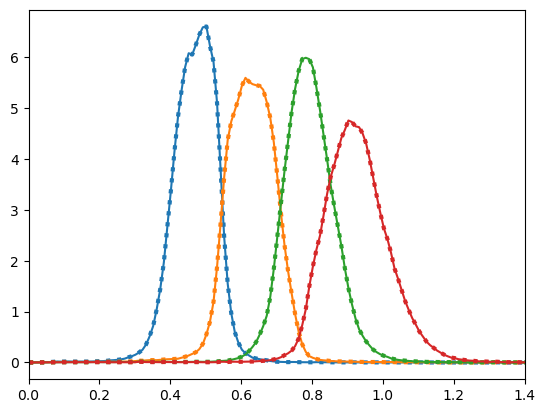

In [6]:
for i in range(4): 
    plt.plot(clPred.z,clPred.dNdz[:,i],c=f'C{i}')
    plt.plot(clPred.z,Wg_clust[:,i]/H,c=f'C{i}',ls='dotted',lw=3)
plt.xlim(0,1.4)

(0.0, 1.2)

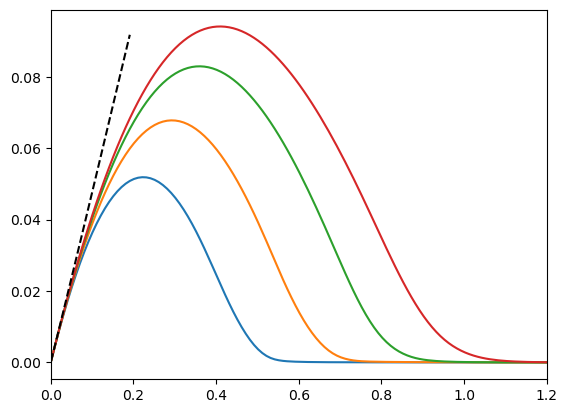

In [7]:
for i in range(4): plt.plot(clPred.z,Wg_mag[:,i]/H)
I = np.where(clPred.z < 0.2)
plt.plot(clPred.z[I],(1.5*OmM*(100./299792.458)**2.*(1.+clPred.z) * chi/H)[I],c='k',ls='--')
plt.xlim(0,1.2)

In [8]:
for i in range(clPred.Ng): print(f'z{i} =',round(clPred.zeff[i],2))

z0 = 0.47
z1 = 0.62
z2 = 0.78
z3 = 0.91


# Testing power spectrum code

In [9]:
thy_args = {} # CLASS defaults
z = 1.        # testing at redshift 1 (arbitrary choice)

pgg = pggVelocileptors(thy_args,z)
pgm = pgmVelocileptors(thy_args,z)
pmm = pmmHalofit(thy_args,z)

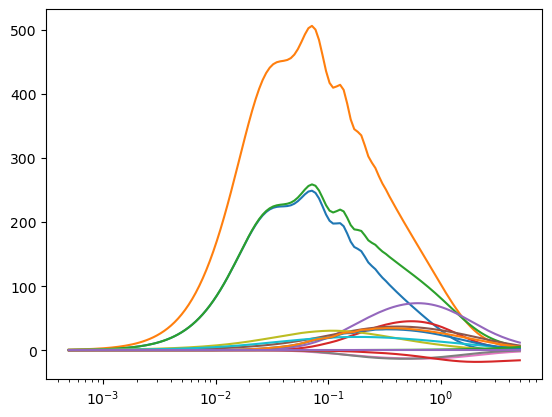

In [10]:
# Pgg
N = pgg.shape[1]-1 # number of templates for Pgg
for i in range(1,N):
    plt.semilogx(pgg[:,0], pgg[:,0]*pgg[:,i])

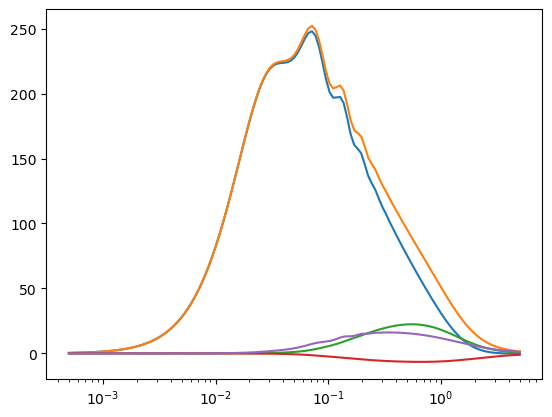

In [11]:
# Pgm
N = pgm.shape[1]-1 # number of templates for Pgm
for i in range(1,N):
    plt.semilogx(pgm[:,0], pgm[:,0]*pgm[:,i])

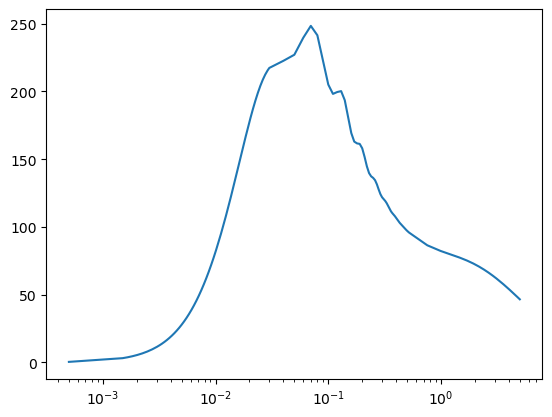

In [12]:
# Pmm
plt.semilogx(pmm[:,0], pmm[:,0] * pmm[:,1])

# Testing Limber intergals

In [ ]:
# TODO